In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib as plt

In [2]:
data = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')

In [3]:
data.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
data.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [20]:

data['Sales'] = data['Sales'].str.replace(',','')
data['Sales'] = data['Sales'].str.replace('$', '')
data['Sales'] = data['Sales'].astype(float)


In [22]:

data['Profit'] = data['Profit'].str.replace(',','')
data['Profit'] = data['Profit'].str.replace('$', '')
data['Profit'] = data['Profit'].astype(float)

In [5]:
data


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium


In [8]:
data['Order.Date'] = pd.to_datetime(data['Order.Date'])
data['Ship.Date'] = pd.to_datetime(data['Ship.Date'])




data['Order.Month'] = data['Order.Date'].dt.to_period('M')
data

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.770,High,2014-11
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.630,Critical,2014-02
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.490,Medium,2014-10
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.160,Medium,2014-01
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.040,Critical,2014-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",$65.10,5,0.0,$4.50,1.010,Medium,2015-06
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",$16.72,5,0.2,$3.34,1.930,High,2014-05
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Office Supplies,Art,Newell 341,$8.56,2,0.0,$2.48,1.580,High,2012-08
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Office Supplies,Binders,"Acco Index Tab, Economy",$13.44,2,0.0,$2.40,1.003,Medium,2013-02


In [12]:
trend =data[['Order.Month', 'Quantity']]
trend = trend.set_index('Order.Month').groupby(pd.Grouper(freq="M")).sum()

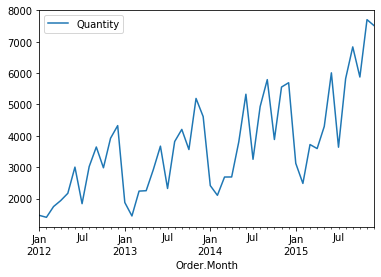

In [13]:
trend.plot.line()

In [14]:
data['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [15]:
data2 = data[['Order.Month', 'Sub.Category', 'Quantity', 'Category']]

In [16]:
data2

,Order.Month,Sub.Category,Quantity,Category
0,2014-11,Phones,2,Technology
1,2014-02,Chairs,9,Furniture
2,2014-10,Phones,9,Technology
3,2014-01,Phones,5,Technology
4,2014-11,Copiers,8,Technology
...,...,...,...,...
51285,2015-06,Fasteners,5,Office Supplies
51286,2014-05,Furnishings,5,Furniture
51287,2012-08,Art,2,Office Supplies
51288,2013-02,Binders,2,Office Supplies


In [17]:
trend_cat = data2.groupby(["Order.Month", "Category"])["Quantity"].count()

In [18]:
trend_cat

Order.Month  Category       
2012-01      Furniture            80
             Office Supplies     286
             Technology           67
2012-02      Furniture            81
             Office Supplies     250
                                ... 
2015-11      Office Supplies    1296
             Technology          444
2015-12      Furniture           432
             Office Supplies    1306
             Technology          415
Name: Quantity, Length: 144, dtype: int64

In [20]:
Furniture = trend_cat[trend_cat.index.get_level_values('Category')=='Furniture']
Technology = trend_cat[trend_cat.index.get_level_values('Category')=='Technology']
Off_Supply = trend_cat[trend_cat.index.get_level_values('Category')=='Office Supplies']

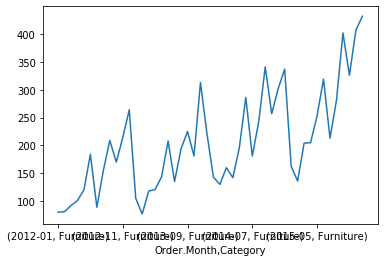

In [21]:
Furniture.plot.line()

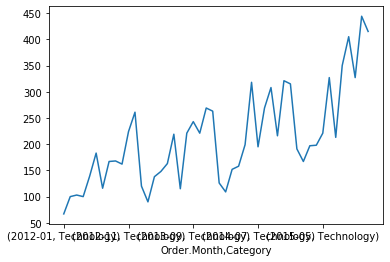

In [22]:
Technology.plot.line()

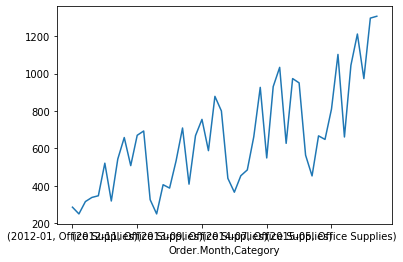

In [23]:
Off_Supply.plot.line()

In [24]:
returns

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...
1074,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,Yes,US-2013-HG14845140-41530,Eastern US
1076,Yes,US-2013-SJ2021582-41543,Central America
1077,Yes,CA-2015-EB13870140-42269,Eastern US


In [25]:
results = pd.concat([data,returns], axis=1, join='inner')

In [26]:
results

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Returned,Order ID,Region
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,$221.98,2,0.0,$62.15,40.77,High,2014-11,Yes,CA-2012-SA20830140-41210,Central US
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"$3,709.40",9,0.1,-$288.77,923.63,Critical,2014-02,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"$5,175.17",9,0.1,$919.97,915.49,Medium,2014-10,Yes,CA-2012-SC20095140-41174,Central US
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"$2,892.51",5,0.1,-$96.54,910.16,Medium,2014-01,Yes,IN-2015-JH158207-42140,Oceania
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"$2,832.96",8,0.0,$311.52,903.04,Critical,2014-11,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,23140,ID-2014-HR148307-41856,2014-08-05,2014-08-07,First Class,HR-148307,Harold Ryan,Corporate,NaN,Sydney,...,$750.20,5,0.1,-$41.81,194.67,High,2014-08,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,26246,IN-2015-ED1388527-42207,2015-07-22,2015-07-25,First Class,ED-1388527,Emily Ducich,Home Office,NaN,Jixi,...,"$1,269.90",6,0.0,$558.72,194.61,Critical,2015-07,Yes,US-2013-HG14845140-41530,Eastern US
1076,19906,ES-2014-TB21520120-41765,2014-05-06,2014-05-08,First Class,TB-21520120,Tracy Blumstein,Consumer,NaN,Huelva,...,$535.65,3,0.1,$232.08,194.60,High,2014-05,Yes,US-2013-SJ2021582-41543,Central America
1077,21950,IN-2013-MW1822027-41633,2013-12-25,2013-12-30,Standard Class,MW-1822027,Mitch Webber,Consumer,NaN,Luoyang,...,"$2,182.68",6,0.0,$174.60,194.55,Medium,2013-12,Yes,CA-2015-EB13870140-42269,Eastern US
